In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import json
import csv
from scipy import stats
import seaborn as sns

1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [16]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [17]:
df = pd.read_csv('data/data_000637.txt')
n = random.randint(10000, df.shape[0])
data = pd.read_csv('data/data_000637.txt', nrows =n)
data.head()


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [18]:
x = data['BX_COUNTER'].max() + 1
print('number of BX in a ORBIT:', x)

number of BX in a ORBIT: 3564


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [19]:
data['TIME_NS'] = data['TDC_MEAS']*(25/30) + data['BX_COUNTER']*25 + data['ORBIT_CNT']*x*25
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_NS
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
671503,1,0,63,3869206781,2497,22,3.447463e+14
671504,1,0,64,3869206781,2501,18,3.447463e+14
671505,1,0,61,3869206781,2509,12,3.447463e+14
671506,1,0,49,3869206781,2643,22,3.447463e+14


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [20]:
period = (data['TIME_NS'].max() - data['TIME_NS'].min()) * 10**(-9) 
print('duration of the data taking', period, 'seconds')

duration of the data taking 0.5893143200000001 seconds


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [21]:
data["COUNT"]=1
data.groupby("TDC_CHANNEL").count().nlargest(3, 'COUNT')['COUNT']

TDC_CHANNEL
139    55743
64     33628
63     33015
Name: COUNT, dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [22]:
count = (df['ORBIT_CNT'] != 0).sum()


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [23]:
unique_orbits  = data[data['TDC_CHANNEL'] == 139].drop_duplicates('ORBIT_CNT')
print('Number of unique orbits with at least one measurement from TDC_CHANNEL=139:', len(unique_orbits))

Number of unique orbits with at least one measurement from TDC_CHANNEL=139: 6586


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [24]:
FPGA_0 = data[data['FPGA'] == 0]
FPGA_1 = data[data['FPGA'] == 1]

TDC_CHANNEL_0 = FPGA_0['TDC_CHANNEL']
TDC_CHANNEL_1 = FPGA_1['TDC_CHANNEL']

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0.5, 1.0, 'FPGA 1')

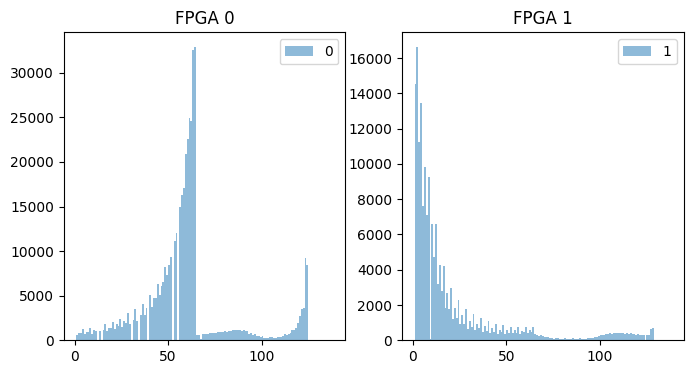

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
ax1.hist( TDC_CHANNEL_0, bins=np.arange(TDC_CHANNEL_0.min(), TDC_CHANNEL_0.max()),label='0', alpha=0.5)
ax2.hist( TDC_CHANNEL_1, bins=np.arange(TDC_CHANNEL_1.min(), TDC_CHANNEL_1.max()),label='1', alpha=0.5)
ax1.legend()
ax1.set_title('FPGA 0')
ax2.legend()
ax2.set_title('FPGA 1')